## Sensing Explore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
activity_u01 = pd.read_csv('../dataset/sensing/activity/activity_u01.csv')

In [3]:
activity_u01.head()

,timestamp,activity inference
0,1364356899,0
1,1364356901,0
2,1364356904,0
3,1364356906,0
4,1364356909,0


In [4]:
activity_u01.index = pd.to_datetime(activity_u01.timestamp,unit='s')

In [5]:
activity_u01.columns

Index(['timestamp', ' activity inference'], dtype='object')

In [6]:
A_u01 = pd.Series(activity_u01[' activity inference'], index=activity_u01.index)

In [7]:
A_u01.head()

timestamp
2013-03-27 04:01:39    0
2013-03-27 04:01:41    0
2013-03-27 04:01:44    0
2013-03-27 04:01:46    0
2013-03-27 04:01:49    0
Name:  activity inference, dtype: int64

In [21]:
A_u01_day = A_u01[(A_u01.index.day == 27)&(A_u01.index.month==3) ]
len(A_u01_day)

6765

750

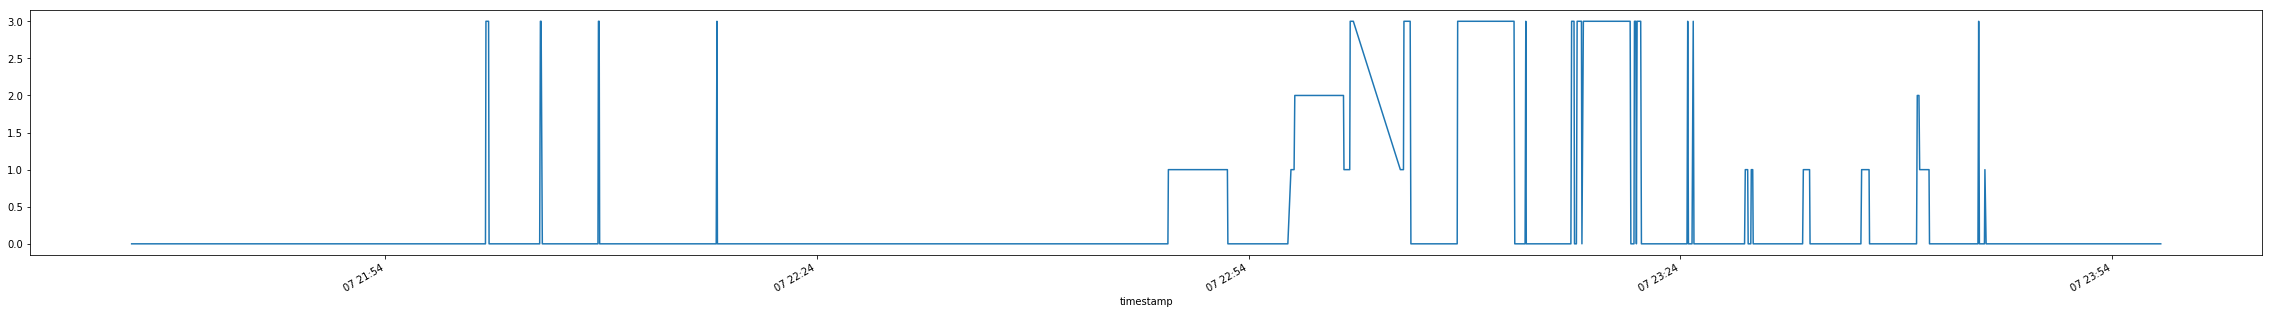

In [43]:
% matplotlib inline
plt.figure(figsize=(40,5))
A_u01_day.plot()
len(A_u01_day)

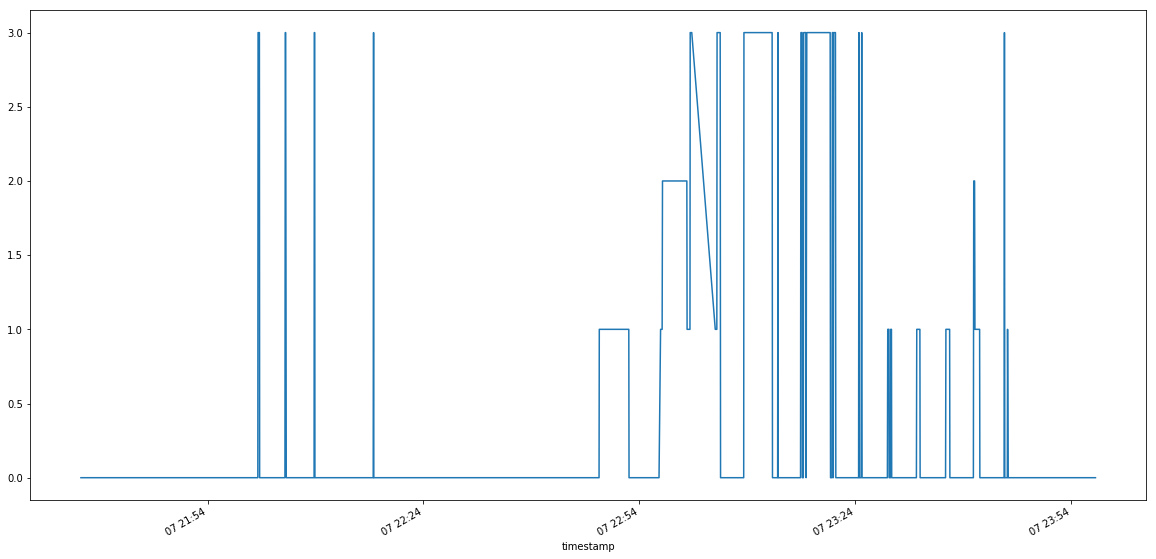

In [39]:
A_u01_day = A_u01[(A_u01.index.day == 7)&(A_u01.index.month==5) ]
% matplotlib inline
plt.figure(figsize=(20,10))
A_u01_day.plot()

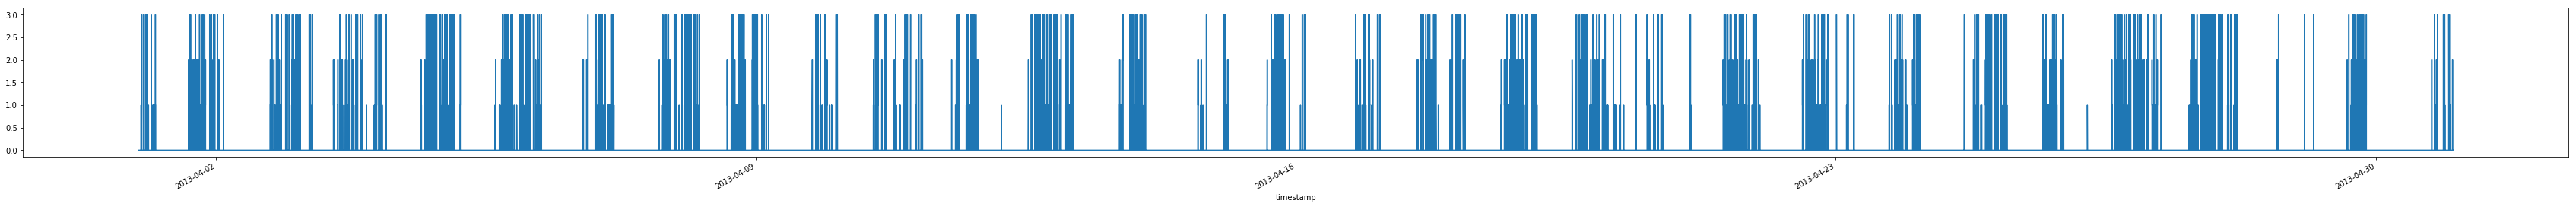

In [42]:
A_u01_month = A_u01[(A_u01.index.month==4) ]
% matplotlib inline
plt.figure(figsize=(60,4))
A_u01_month.plot()

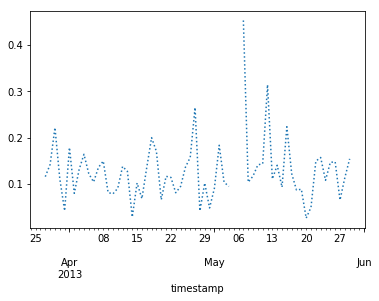

In [9]:

% matplotlib inline
weekly = activity_u01[' activity inference'].resample('D').mean()
weekly.plot(style = [':','--','-'])

In [11]:
ddl = pd.read_csv('../dataset/education/deadlines.csv')

In [12]:
ddl.head()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-08-10,2013-08-11,2013-08-12,2013-08-13,2013-08-14,2013-08-15,2013-08-16,2013-08-17,2013-08-18,2013-08-19
0,u01,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u02,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u03,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u04,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u05,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ddl_mod = ddl.dropna(axis = 1, how = 'all')
ddl_mod = ddl_mod.loc[:, (ddl_mod != 0).any(axis=0)]

In [15]:
ddl_plt = ddl_mod[ddl_mod.columns[1:]].sum()#.astype('int64')
# ddl_plt

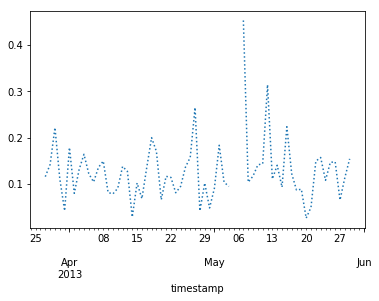

In [18]:
# ddl_plt.plot(style = [':','--','-'])
weekly.plot(style = [':','--','-'])

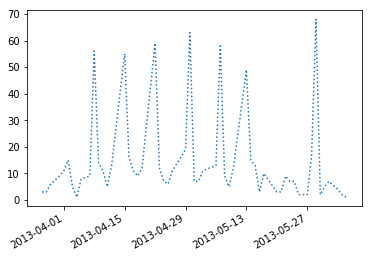

In [76]:
ddl_plt.plot(style = [':','--','-'])
plt.savefig('timeseries.png')

In [63]:
ddl_plt.index = pd.to_datetime(ddl_plt.index)

In [64]:
ddl_plt.index

DatetimeIndex(['2013-03-27', '2013-03-28', '2013-03-29', '2013-03-31',
               '2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04',
               '2013-04-05', '2013-04-07', '2013-04-08', '2013-04-09',
               '2013-04-10', '2013-04-11', '2013-04-12', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25',
               '2013-04-26', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-06', '2013-05-07',
               '2013-05-08', '2013-05-09', '2013-05-10', '2013-05-13',
               '2013-05-14', '2013-05-15', '2013-05-16', '2013-05-17',
               '2013-05-20', '2013-05-21', '2013-05-22', '2013-05-23',
               '2013-05-24', '2013-05-25', '2013-05-26', '2013-05-27',
               '2013-05-28', '2013-05-29', '2013-05-30', '2013-05-31',
               '2013-06-01', '2013-06-03', '2013-06-04', '2013-06-05'],
     

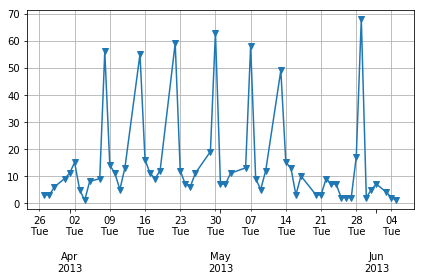

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates



fig, ax = plt.subplots()
ax.plot_date(ddl_plt.index, ddl_plt, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

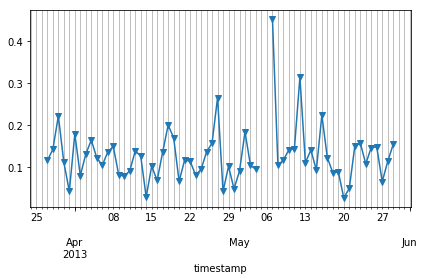

In [74]:
weekly = activity_u01[' activity inference'].resample('D').mean()
fig, ax = plt.subplots()
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor") 
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

weekly.plot(style = ["v-"]) #style = [':','--','-']
plt.tight_layout()
plt.show()